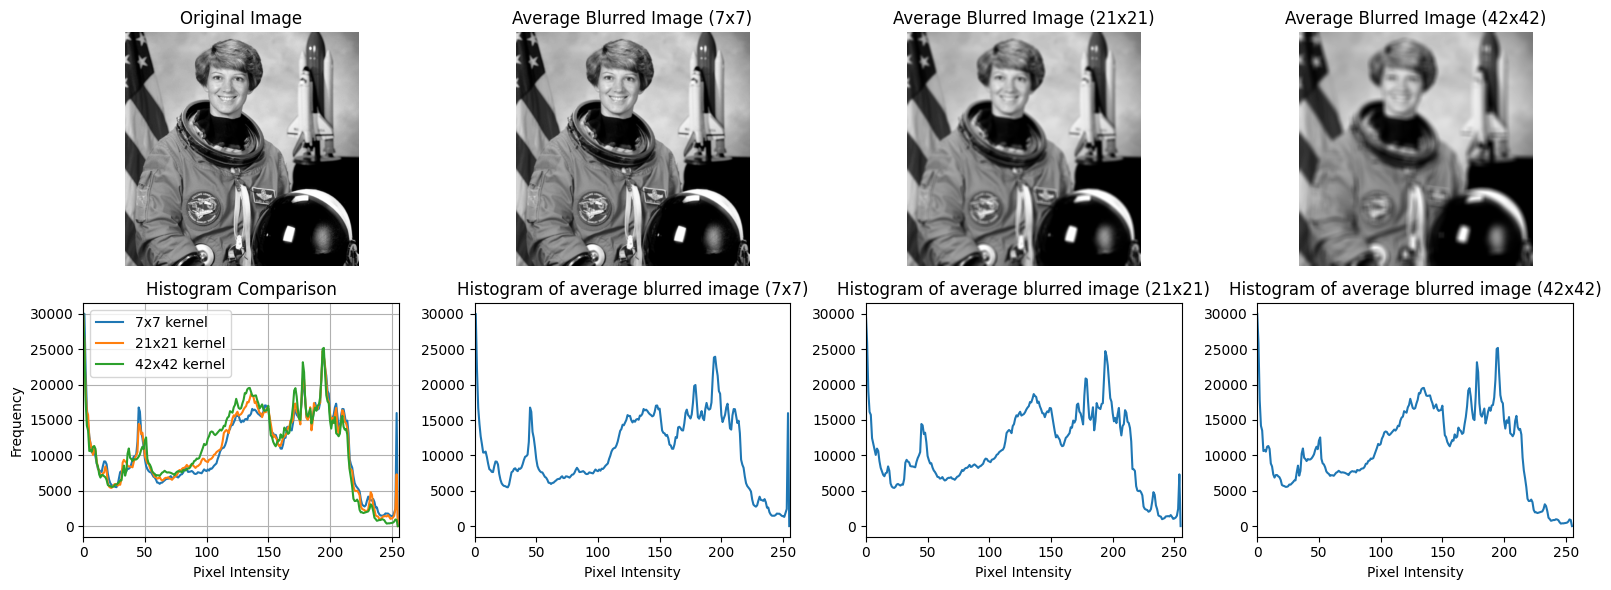

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 이미지 불러오기 (Grayscale로)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# 다양한 커널 사이즈 설정
kernel_sizes = [7, 21, 42]

# 서브플롯 크기 설정
cols = len(kernel_sizes) + 1  # 원본 이미지 포함
rows = 2  

# 서브플롯의 전체 크기 설정
plt.figure(figsize=(cols * 4, rows * 3))

# 원본 이미지 출력 (첫 번째 줄)
plt.subplot(rows, cols, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 원본 이미지의 히스토그램 계산
original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
max_threshold = 30_000  # 최대 빈도수 설정 (클리핑)
original_hist[original_hist > max_threshold] = max_threshold

# 블러링된 이미지와 히스토그램 출력
blurred_images = []
blurred_hists = []

for i, ks in enumerate(kernel_sizes):
    # 평균 커널 생성 및 블러링 적용
    kernel = np.ones((ks, ks), np.float32) / ks**2
    blurred_image = cv2.filter2D(image, -1, kernel)
    blurred_images.append(blurred_image)

    # 블러링된 이미지 출력 (첫 번째 줄)
    plt.subplot(rows, cols, i + 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title(f'Average Blurred Image ({ks}x{ks})')
    plt.axis('off')

    # 블러링된 이미지의 히스토그램 계산 및 클리핑
    blurred_hist = cv2.calcHist([blurred_image], [0], None, [256], [0, 256])
    blurred_hist[blurred_hist > max_threshold] = max_threshold
    blurred_hists.append(blurred_hist)

    # 블러링된 이미지의 히스토그램 출력 (두 번째 줄)
    plt.subplot(rows, cols, cols + i + 2)
    plt.plot(blurred_hist)
    plt.title(f'Histogram of average blurred image ({ks}x{ks})')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')

# 원본 및 모든 블러링된 이미지의 히스토그램 비교

plt.subplot(rows, cols, cols + 1)
plt.title('Histogram Comparison')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

for i, ks in enumerate(kernel_sizes):
    plt.plot(blurred_hists[i], label=f'{ks}x{ks} kernel')

plt.xlim([0, 256])
plt.legend()
plt.grid(True)

# 히스토그램 그래프 설정
# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()